In [1]:
%matplotlib inline
from IPython.display import display, Math
import sympy as sp
import numpy as np
from sympy import init_printing
init_printing() # doctest: +SKIP
from mueller_matrices import M_Retarder

## Sample model: linear retarder with retardance $\delta$ and fast axis $\theta$
#### Slow axis is $\phi = \theta + \pi/2$

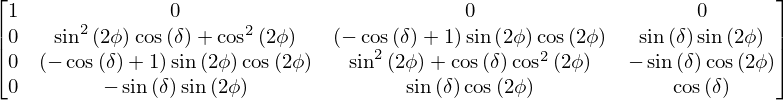

In [2]:
delta, phi = sp.symbols('delta, phi')
M_sample = M_Retarder(phi - sp.pi/2, delta)

M_sample

## Sample may also have transmission $t$ and degree of polarization $p$

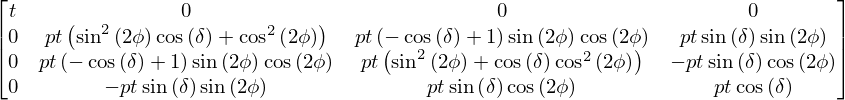

In [3]:
t, p = sp.symbols('t, p')
M_tp = sp.Matrix([[t, 0, 0, 0], [0, t*p, 0, 0], [0, 0, t*p, 0], [0, 0, 0, t*p]])
M_sample = M_tp * M_sample

M_sample

## Stokes vector of excitation light

In [24]:
S_unp = sp.Matrix([[1, 0, 0, 0]]).T
S_rcp = sp.Matrix([[1, 0, 0, 1]]).T
S_lcp = sp.Matrix([[1, 0, 0, -1]]).T
S = sp.Matrix([sp.symbols('s0:4')]).T
S_bg = sp.Matrix([sp.symbols('s_0:4^{bg}')]).T
S_out = sp.Matrix([sp.symbols('s_0:4^{out}')]).T

## Model 1: Excitation using RCP light

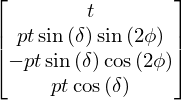

In [5]:
S_sample = M_sample * S_rcp

S_sample

## The microscope measures the stokes vector of ligth $\vec s = \left< s_0, s_1, s_2, s_3 \right>$ after interacting with the sample

In [6]:
transmission = S[0]
slow_axis = 0.5 * sp.atan(-S[1]/S[2])
retardance = sp.atan(sp.sqrt(S[1]**2+S[2]**2)/S[3])
polarization = sp.sqrt(S[1]**2+S[2]**2+S[3]**2)/S[0]

display(Math('transmission = '+sp.latex(transmission)))
display(Math('slow\, axis = '+sp.latex(slow_axis)))
display(Math('retardance = '+sp.latex(retardance)))
display(Math('polarization = '+sp.latex(polarization)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Model 2: Excitaiton with an elliptical state

We treat the input Stokes vector as background the Stokes vector. If not corrected for, it is the polarization state in the background.

In [36]:
S_measured = M_sample * S_bg

display(Math(sp.latex(S_out)+'='+sp.latex(M_sample * S_bg)))

<IPython.core.display.Math object>

### 2a. If S_in = S_rcp

In [37]:
display(Math(sp.latex(S_out)+'='+sp.latex(S_measured.subs({'s_0^{bg}':1,'s_1^{bg}':0,'s_2^{bg}':0,'s_3^{bg}':1}))))

<IPython.core.display.Math object>

### 2b. If sample retardance is small, it is possible to correct for large background

use Taylor series expansion of $cos(\delta)$ 

$cos(\delta)=1-\frac{x^2}{2!}+\frac{x^4}{4!}+...$

In [75]:
S2 = S_measured.subs({sp.cos(delta):1,p:1})
display(Math(sp.latex(S_out)+'='+sp.latex(sp.trigsimp(S2))))

<IPython.core.display.Math object>

### $t=\frac{s_0^{out}}{s_0^{bg}}$

Now, normalize the LHS by $s_0^{out}$ and the RHS by $s_0^{bg}t$ and define  $s_{*n}=s_{*}/s_0$

In [76]:
S2n = S2.subs({'s_0^{bg}':1,'t':1,'s_1^{bg}':'s_{1n}^{bg}','s_2^{bg}':'s_{2n}^{bg}','s_3^{bg}':'s_{3n}^{bg}'})
S_outn = S_out.subs({'s_0^{out}':1,'s_1^{out}':'s_{1n}^{out}','s_2^{out}':'s_{2n}^{out}','s_3^{out}':'s_{3n}^{out}'})
display(Math(sp.latex(S_outn)+'='+sp.latex(sp.trigsimp(S2n))))

<IPython.core.display.Math object>

### $\phi=\frac{1}{2}\arctan(-\frac{s_{1n}^{out}-s_{1n}^{bg}}{s_{2n}^{out}-s_{2n}^{bg}})$

### $\delta=\arcsin(\frac{\sqrt{(s_{1n}^{out}-s_{1n}^{bg})^2+(s_{2n}^{out}-s_{2n}^{bg})^2}}{s_{3n}^{bg}})$

### If $s_1^{bg}$ and $s_2^{bg}$  are non-zero, but small; if p $\approx$ 1

## Model 3: Background as a non-ideal linear retarder

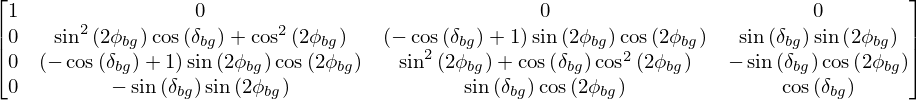

In [73]:
delta_bg, phi_bg = sp.symbols('delta_bg, phi_bg')

M_bg = M_Retarder(phi_bg - sp.pi/2, delta_bg)
M_bg

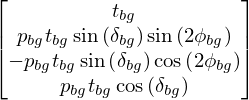

In [74]:
t_bg, p_bg = sp.symbols('t_bg, p_bg')

M_tpbg = sp.Matrix([[t_bg, 0, 0, 0], [0, t_bg*p_bg, 0, 0], [0, 0, t_bg*p_bg, 0], [0, 0, 0, t_bg*p_bg]])

S_bg = M_tpbg * M_bg * S_rcp
S_bg

#### How does changing the order of background retarder affect the output Stokes vector?

#### Depolarization affects the accuracy of background correction

#### Full equations can be solved without assuming small retardance and depolarization